In [85]:
%pylab inline

from matplotlib import rc

fig_font = {'family':'sans-serif','sans-serif':['Helvetica'],
           'serif':['Helvetica'],'size':14}
rc('font',**fig_font)
rc('legend',fontsize=14, handletextpad=0.5)
rc('text', usetex=True)
rc('figure', figsize=(3.33,2.22))
#  rc('figure.subplot', left=0.10, top=0.90, bottom=0.12, right=0.95)
rc('axes', linewidth=0.5, color_cycle= ['#496ee2', '#8e053b', 'm', '#ef9708', 'g', 'c'])
rc('lines', linewidth=1)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [86]:
def fig_to_file(fig, filename, ext):
    fig.savefig("graphs/%s.%s" % (filename, ext), format=ext, bbox_inches='tight')

In [87]:
import csv

clients = {1,2,3,4,5,6,7,8,9}
latency = {}
cdf_y = {}

for c in clients:
    latency[c]=[] 
    for client in range(0,c-1):
        with open('results/3s'+str(c)+'c/latency_'+str(client)+'.csv', newline='') as csvfile:
            for row in csv.reader(csvfile):
                latency[c].append(int(row[2])/1000000)
    latency[c].sort()
    
    cdf_y[c]=[]
    size=len(latency[c])
    for y in range (1,size+1):
        cdf_y[c].append(y*100.0/size)


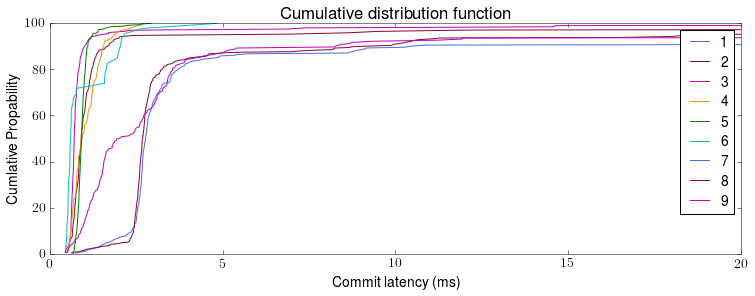

In [88]:
# plot simple CFD
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Commit latency (ms)')
axes.set_ylabel('Cumlative Propability')
axes.set_title('Cumulative distribution function')

axes.set_xlim([0,20])
axes.set_ylim([0,100])


for c in clients:
    axes.plot(latency[c], cdf_y[c])

axes.legend(clients,loc=1,frameon=True)

In [89]:
# calculating throughput

for c in clients:
    print([
 ("clients", c),
 ("number of requests", len(latency[c])),
 ("sum", np.sum(latency[c])),
 ("throughput (req per sec)", 1000 * len(latency[c]) / np.sum(latency[c]))])

[('clients', 1), ('number of requests', 0), ('sum', 0.0), ('throughput (req per sec)', nan)]
[('clients', 2), ('number of requests', 171), ('sum', 535.09190699999999), ('throughput (req per sec)', 319.57126946418197)]
[('clients', 3), ('number of requests', 201), ('sum', 297.51768300000003), ('throughput (req per sec)', 675.59009593389442)]
[('clients', 4), ('number of requests', 120), ('sum', 127.138972), ('throughput (req per sec)', 943.84906620135325)]
[('clients', 5), ('number of requests', 333), ('sum', 317.95129199999997), ('throughput (req per sec)', 1047.3302306945809)]
[('clients', 6), ('number of requests', 46), ('sum', 46.761668), ('throughput (req per sec)', 983.71170164417572)]
[('clients', 7), ('number of requests', 318), ('sum', 1967.0090499999999), ('throughput (req per sec)', 161.66677016559737)]
[('clients', 8), ('number of requests', 439), ('sum', 2277.6678629999997), ('throughput (req per sec)', 192.7410080861294)]
[('clients', 9), ('number of requests', 205), ('sum

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars
